In [34]:
from PIL import Image
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import math
import random
import numpy as np

def round_colors(colors):
    k = list(colors.keys())[0]
    rounded_colors = {}
    for r in range(0,250, 10):
        for g in range(0,250, 10):
            for b in range(0,250, 10): 
                temp = []
                for ri in range(-5,5):
                    for bi in range(-5,5):
                        for gi in range(-5,5):
                            if len(k) == 4:
                                temp.append(colors[(r+ri, g+gi, b+bi, 255)])
                            else:
                                temp.append(colors[(r+ri, g+gi, b+bi)])
                if sum(temp)>0:
                    rounded_colors[(r,g,b)] = sum(temp)
    return rounded_colors

def make_array1(n):
    array = np.zeros((n,n))
    for r in range(n):
        for c in range(n):
            if r==c==0:
                array[r,c] = 0
            elif r-1 < 0:
                array[r,c] = array[r, c-1] + (c)
            else:
                array[r,c] = array[r-1, c] + (c+r+1)
    array[n-1,n-1] = int(array[n-1,n-1])
    return array

def make_array2(n):
    array = np.zeros((n,n))
    for r in range(n):
        for c in range(n):
            array[r,c] = (r**2 + c**2)**.5
    return array

def make_array3(n):
    center = int(n/2)
    
    array = np.zeros((n,n))
    for r in range(n):
        for c in range(n):
            array[r,c] = ((center-r)**2 + (center-c)**2)**.5
    return array

def make_array4(n):
    center = int(n/2)
    array_max = n**2
    array = np.zeros((n,n))
    for r in range(n):
        for c in range(n):
            array[r,c] = array_max - ((center-r)**2 + (center-c)**2)**.5
    return array

def make_color_map_and_array(colors, 
                             threshold = 30, 
                             make_sorted = False,
                             sort_key = 2, 
                             num_colors = None):
    top_colors = [x for x in colors.items() if x[1] > threshold]
    top_colors = [x[0] for x in top_colors]
    try:
        top_colors = [(x[0]/255, x[1]/255, x[2]/255, x[3]/255)  for x in top_colors]
    except IndexError:
        top_colors = [(x[0]/255, x[1]/255, x[2]/255)  for x in top_colors]
    if num_colors == None:
        num_colors = len(top_colors)
#     sq = int(math.sqrt(len(top_colors)))
    try:
        if make_sorted:
            select_col = sorted(random.sample(top_colors, num_colors), key = lambda x: x[sort_key])
        else:
            select_col =random.sample(top_colors, num_colors)
    except ValueError:
        num_colors = len(top_colors)
        if make_sorted:
            select_col = sorted(random.sample(top_colors, num_colors), key = lambda x: x[sort_key])
        else:
            select_col =random.sample(top_colors, num_colors)
    cm = LinearSegmentedColormap.from_list("my_cmap", select_col, N=num_colors)
    return cm


In [35]:
'''
make_color_map_and_array(colors dictionary, 
                pixel number threshold default = 30, 
                sort colors default = False, 
                array type default =1 (linear array), 
                value to sort colors by (0 = Red, 1=Green 2=Blue) default = 2, 
                number of colors to use default = len(colors above threshold,
                smooth (int) number of pixels per side of the resulting array default = 10)
'''
img = Image.open("/Users/kristasmith/Pictures/KBphotos/IMG_0697.jpg")
colors = Counter(img.getdata())
rounded_colors = round_colors(colors)


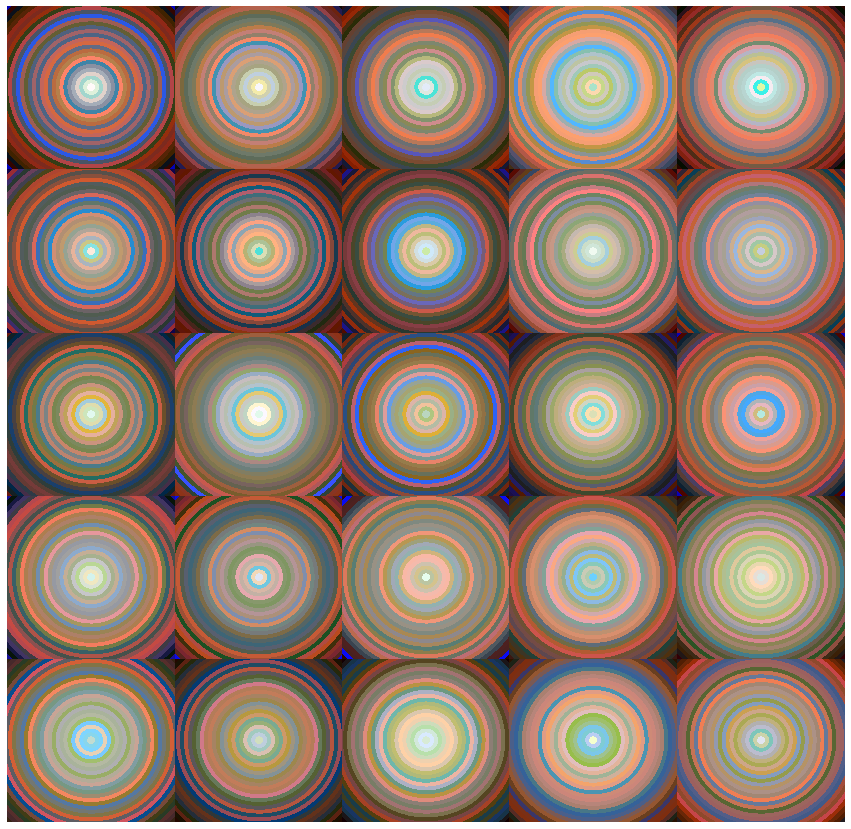

In [40]:
a1 = make_array4(600)

fig = plt.figure(figsize = (15,15))


dim = 5
for i in range(1,(dim**2)+1):
    cm1 = make_color_map_and_array(colors, 0, True, 1, 30)
    ax = plt.subplot(dim,dim,i)
    ax.axis("off")
    plt.imshow(a1, aspect='auto',cmap=cm1, origin="upper")

plt.subplots_adjust(wspace = .00, hspace = .00)
plt.savefig('photo2.jpg')

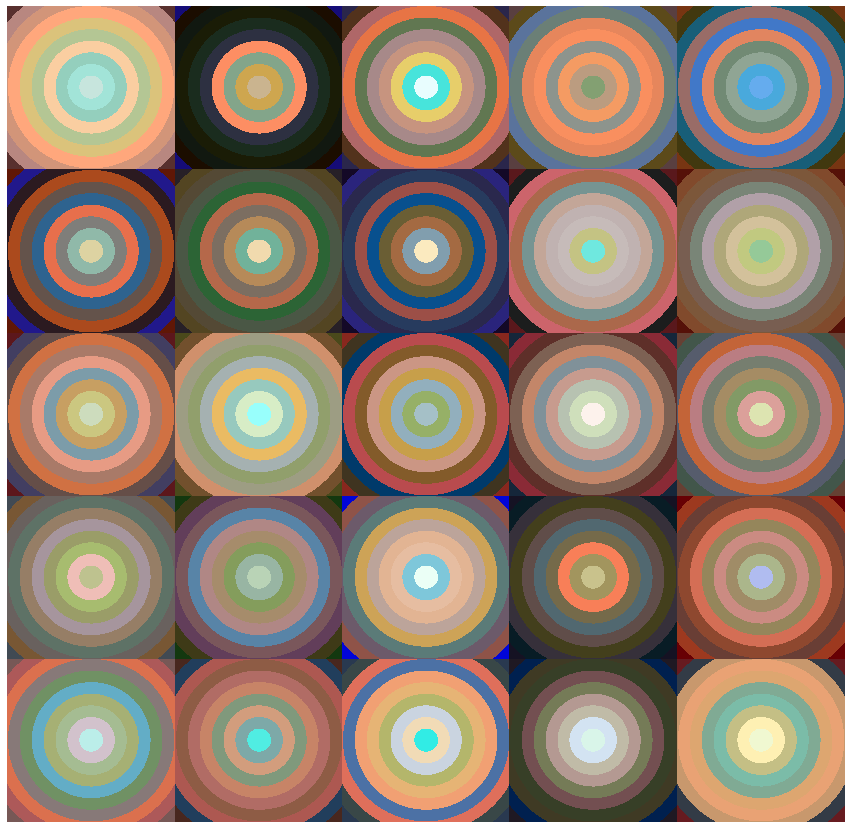

In [41]:
a2 = np.divide(a1, 2)
fig = plt.figure(figsize = (15,15))

for i in range(1,(dim**2)+1):
    cm1 = make_color_map_and_array(colors, 0, True, 1, 10)
    ax = plt.subplot(dim,dim,i)
    ax.axis("off")
    plt.imshow(a2, aspect='auto',cmap=cm1, origin="upper")

plt.subplots_adjust(wspace = .00, hspace = .00)
plt.savefig('photo2.jpg')